# Imports

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Data

In [24]:
accident_df = pd.read_csv('./Data/accident.csv')

# EDA

In [25]:
accident_df.head(5)

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [26]:
# the dataset is small
# so i will use a simpler model
# i will also use k-fold-cross-validation or leave-one-out-cross-validation

accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


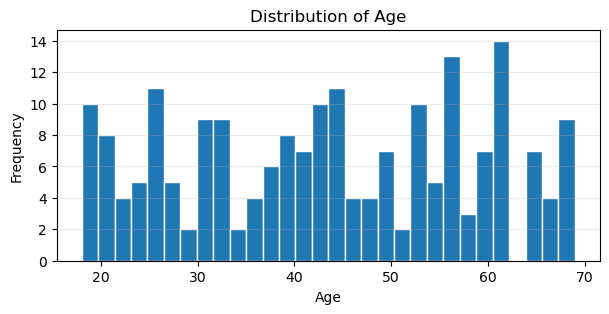

In [27]:
plt.figure(figsize=(7, 3))
plt.hist(accident_df['Age'], bins=30, edgecolor='white')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.25)
plt.show()

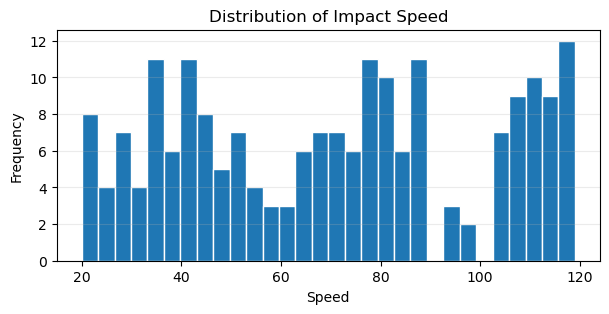

In [28]:
plt.figure(figsize=(7, 3))
plt.hist(accident_df['Speed_of_Impact'], bins=30, edgecolor='white')
plt.title('Distribution of Impact Speed')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.25)
plt.show()